In [1]:
from __future__ import division
from pylab import *
from scipy import optimize
import numpy as np
import pandas as pd

import Jesse_Funcs_New.JessePlot
import Jesse_Funcs_New.blahut as blahut
import Jesse_Funcs_New.helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
test_mat = data_file['data'].item()['C_nonequal']
np.round(test_mat, 2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.9 ,  1.93]])

In [3]:
data_file = np.load('C_nonequal_optimized_new_PCM_more_states.npz')
test_mat_new = data_file['data'].item()['C_nonequal']
np.round(test_mat_new, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.81],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.93],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.86],
       [ 1.  ,  1.56,  1.57,  1.93,  1.99]])

In [4]:
data_file = np.load('C_nonequal_test_intialize_32_states.npz')
new_states = data_file['data'].item()['C_nonequal']
np.round(new_states, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.98],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [5]:
data_file = np.load('C_nonequal_test_intialize_64_states.npz')
new_states_64 = data_file['data'].item()['C_nonequal']
np.round(new_states_64, 3)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.83 ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  2.007],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  2.001],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [6]:
combined_mat_idx = [test_mat>0.0]
test_mat_new[combined_mat_idx] = test_mat[combined_mat_idx]
test_mat_new[3][4]=new_states[3][4]
ys_new = np.round(test_mat_new, 2)
print (ys_new)

[[ 1.    1.    1.    1.    1.  ]
 [ 1.    1.56  1.7   1.77  1.81]
 [ 1.    1.66  1.82  1.88  1.93]
 [ 1.    1.81  1.9   1.93  1.98]
 [ 1.    1.56  1.57  1.93  1.99]]


/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  


In [7]:
combined_mat_idx = [test_mat>0.0]
new_states_64[combined_mat_idx] = test_mat[combined_mat_idx]
np.round(new_states_64,2)

/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 4
  


array([[ 1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77,  0.  ,  1.83],
       [ 1.  ,  1.66,  1.82,  1.88,  0.  ,  2.01],
       [ 1.  ,  1.81,  1.9 ,  1.93,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [10]:
new_states_64[:4,4] = ys_new[:4,4]
new_states_64[0,5] = 1.0
np.round(new_states_64,2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77,  1.81,  1.83],
       [ 1.  ,  1.66,  1.82,  1.88,  1.93,  2.01],
       [ 1.  ,  1.81,  1.9 ,  1.93,  1.98,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

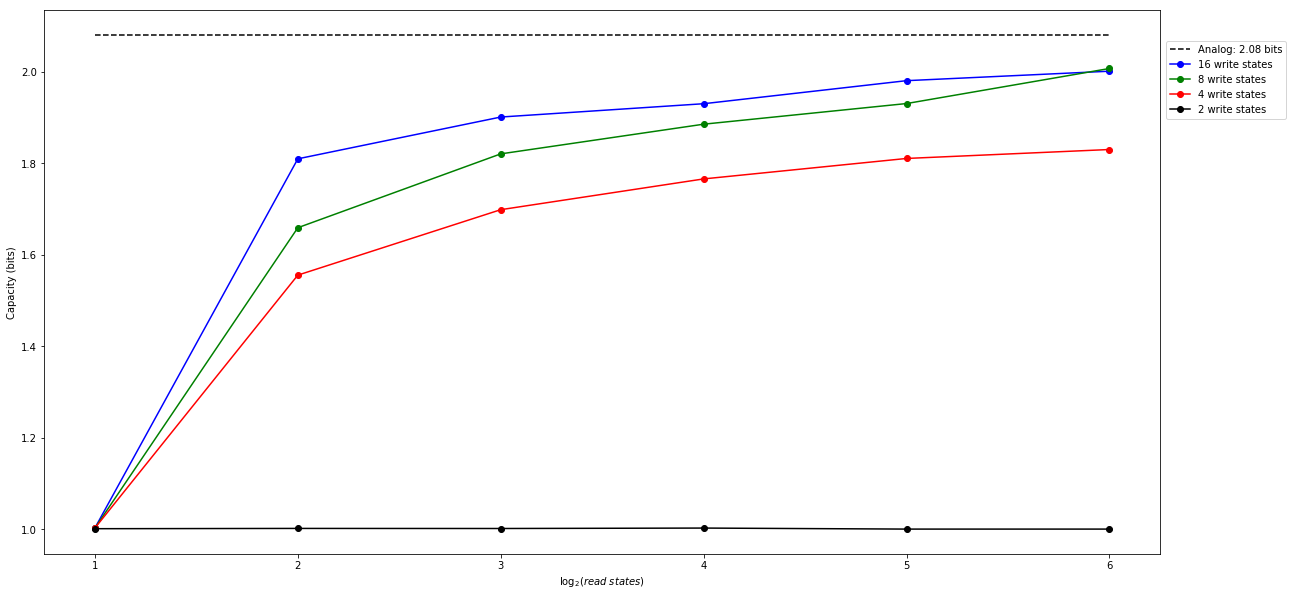

In [13]:
plt.figure(figsize=(20,10))
x_plot = np.array([4,3,2,1])
x = np.flip(x_plot, axis=0)
x = np.append(x,[5])
x = np.append(x,[6])
ys_new = new_states_64
colors = ['black', 'red','green','blue']
plt.plot(x, 2.08*np.ones_like(x), c='black' ,linestyle='--')
for i in x_plot:
    plt.plot(x,ys_new[i-1,:], c=colors[i-1], marker='o')
plt.legend(["Analog: 2.08 bits","16 write states", "8 write states", "4 write states", "2 write states"], loc = (1.005,0.8))
plt.xlabel(r"${\log}_{2} \left(read \ states\right)$")
plt.ylabel("Capacity (bits)")
plt.savefig("Plots/discrete_cap.png")

In [16]:
data_file = np.load("Blahut_States.npz")
states = data_file['data'].item()['states']
states_new = np.zeros(16)
states_new[:13] = states[:13]
states_new[13:15] = [1.26,1.27]
states_new[15] = states[-1]

array([ 0.7       ,  0.75685619,  0.79364548,  0.84715719,  0.86722408,
        0.90401338,  0.94080268,  0.99431438,  1.01772575,  1.05451505,
        1.16822742,  1.21170569,  1.25852843,  1.26      ,  1.27      ,
        1.7       ])

In [18]:
source_states_16_states = states_new
source_states_16_states

array([ 0.7       ,  0.75685619,  0.79364548,  0.84715719,  0.86722408,
        0.90401338,  0.94080268,  0.99431438,  1.01772575,  1.05451505,
        1.16822742,  1.21170569,  1.25852843,  1.26      ,  1.27      ,
        1.7       ])

In [19]:
blahut_states_16_states = dict(source_states_16 = source_states_16_states )
savez("Blahut_States_16_states.npz", data=blahut_states_16_states)